### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from glob import glob
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path(r"C:\Users\MANDAR\Downloads\upgrade\NN\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path(r"C:\Users\MANDAR\Downloads\upgrade\NN\Project\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split= 0.4,  # You can adjust the validation split as needed
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size= batch_size  # You can adjust the batch size as needed
)

Found 6739 files belonging to 9 classes.
Using 4044 files for training.


In [6]:
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_test,
    validation_split=0.4,  # You can adjust the validation split as needed
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size= batch_size  # You can adjust the batch size as needed
)

Found 118 files belonging to 9 classes.
Using 47 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

Images from folder: actinic keratosis


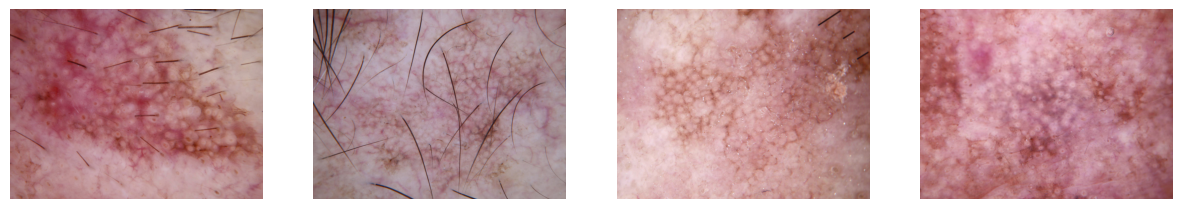

Images from folder: basal cell carcinoma


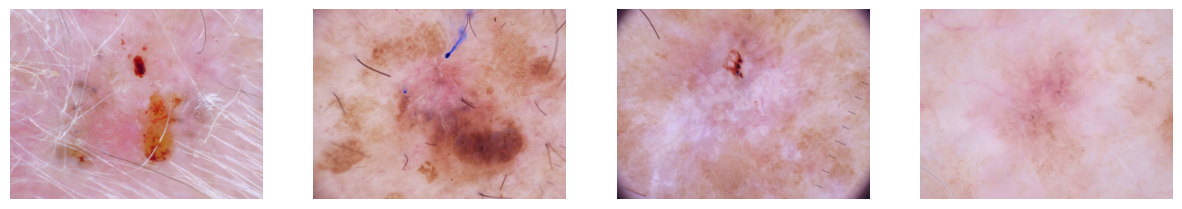

Images from folder: dermatofibroma


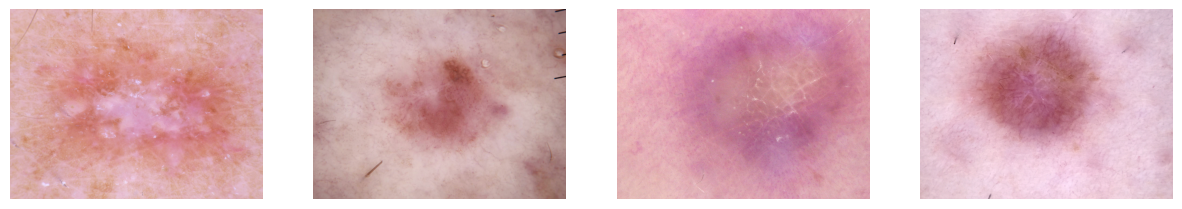

Images from folder: melanoma


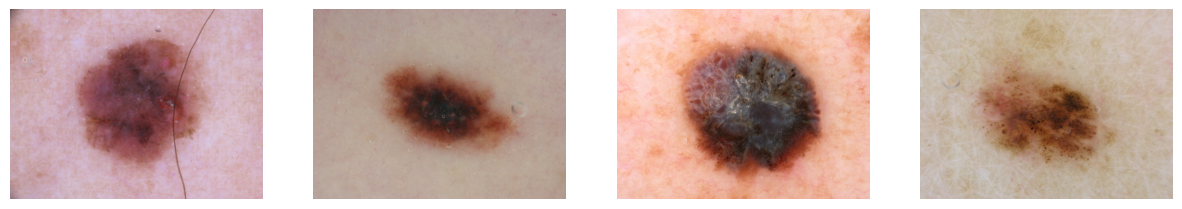

Images from folder: nevus


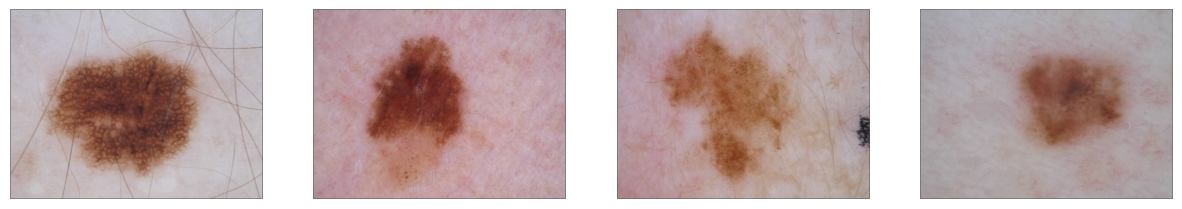

Images from folder: pigmented benign keratosis


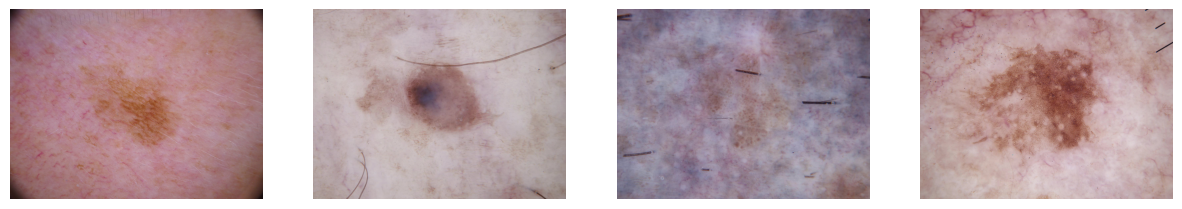

Images from folder: seborrheic keratosis


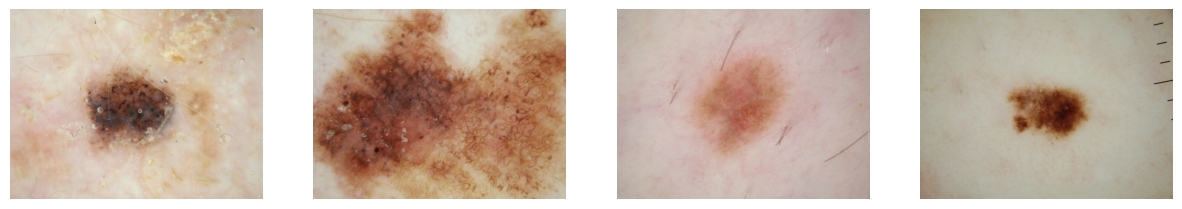

Images from folder: squamous cell carcinoma


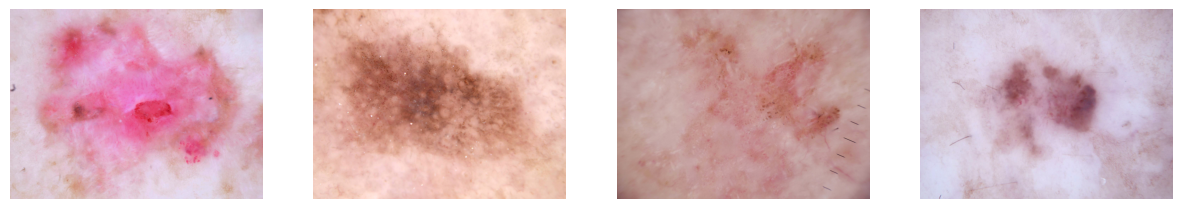

Images from folder: vascular lesion


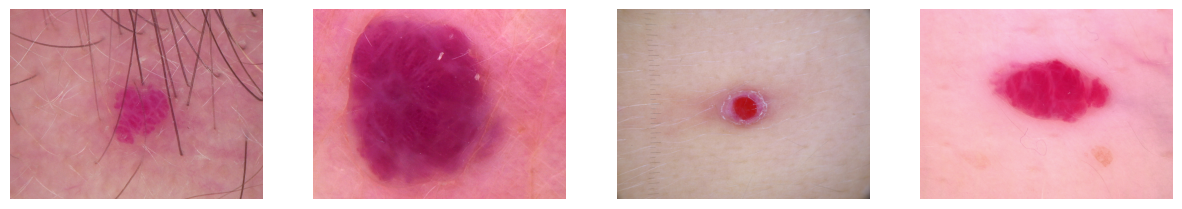

In [8]:
import matplotlib.pyplot as plt

import os
from PIL import Image
import matplotlib.pyplot as plt

def display_images_in_grid(images, grid_size=(1, 4)):
    fig, axs = plt.subplots(*grid_size, figsize=(15, 7))
    axs = axs.ravel()

    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')

    plt.show()

def print_images_from_folders(root_dir, num_images=4):
    for foldername in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, foldername)

        # Check if the current item is a directory
        if os.path.isdir(folder_path):
            print(f"Images from folder: {foldername}")
            image_count = 0
            images_to_display = []

            # Loop through files in the folder
            for filename in os.listdir(folder_path):
                if image_count == num_images:
                    break

                file_path = os.path.join(folder_path, filename)

                # Check if the current item is a file and is an image (you can customize the list of valid extensions)
                if os.path.isfile(file_path) and any(file_path.lower().endswith(ext) for ext in ['.jpg', '.jpeg', '.png']):
                    # Open the image and append it to the list
                    img = Image.open(file_path)
                    images_to_display.append(img)
                    image_count += 1

            # Display the images in a grid
            display_images_in_grid(images_to_display)

if __name__ == "__main__":
    print_images_from_folders(data_dir_train)




In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model

In [12]:
# Set the seed for reproducibility
seed = 123
tf.random.set_seed(seed)

# Define the image size
img_height, img_width = 180, 180
num_classes = 9

# Define the CNN model
model = models.Sequential()

# Preprocessing layer to rescale pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compile the model

In [13]:
your_loss_function_goes_here = 'sparse_categorical_crossentropy'

model.compile(optimizer="adam",
              loss=your_loss_function_goes_here,
              metrics=['accuracy'])

### Train the model

In [14]:
epochs = 20
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    batch_size=batch_size)

Epoch 1/20


127/127 [==============================] - 90s 659ms/step - loss: 2.9427 - accuracy: 0.1899 - val_loss: 2.2014 - val_accuracy: 0.1489
Epoch 2/20
127/127 [==============================] - 90s 707ms/step - loss: 1.9830 - accuracy: 0.2925 - val_loss: 2.3315 - val_accuracy: 0.1915
Epoch 3/20
127/127 [==============================] - 87s 687ms/step - loss: 1.8299 - accuracy: 0.3501 - val_loss: 2.1579 - val_accuracy: 0.3404
Epoch 4/20
127/127 [==============================] - 77s 607ms/step - loss: 1.7148 - accuracy: 0.3880 - val_loss: 2.0378 - val_accuracy: 0.2979
Epoch 5/20
127/127 [==============================] - 80s 628ms/step - loss: 1.6733 - accuracy: 0.4095 - val_loss: 2.3317 - val_accuracy: 0.2979
Epoch 6/20
127/127 [==============================] - 88s 689ms/step - loss: 1.6796 - accuracy: 0.4045 - val_loss: 2.8518 - val_accuracy: 0.1915
Epoch 7/20
127/127 [==============================] - 85s 669ms/step - loss: 1.6139 - accuracy: 0.4320 - val_loss: 2.6178 - val_

### Visualizing training results

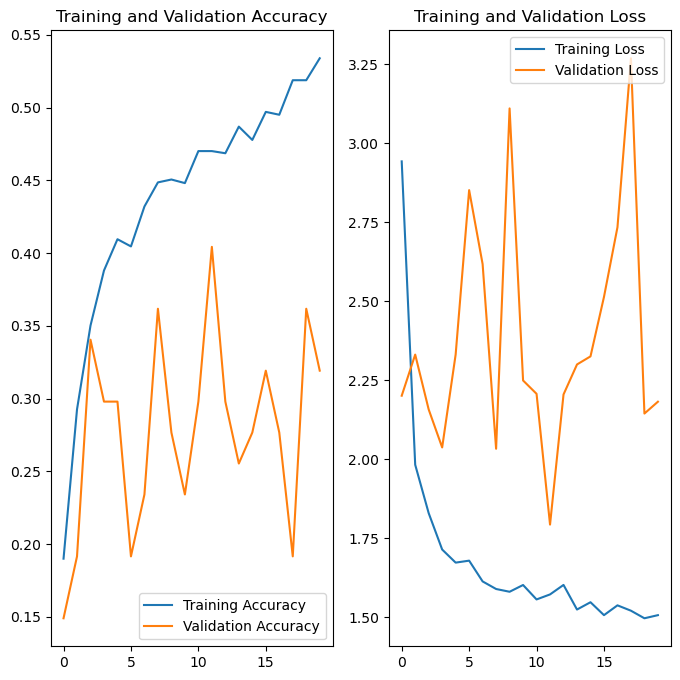

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Create the model, compile and train the model

In [16]:
# Set the seed for reproducibility
seed = 123
tf.random.set_seed(seed)

# Define the image size
img_height, img_width = 180, 180
num_classes = 9

# Define the CNN model
model = models.Sequential()

# Preprocessing layer to rescale pixel values between (0, 1)
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

# Convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional layers to dense layers
model.add(layers.Flatten())

# Dense layers
model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

### Compiling the model

In [17]:
your_loss_function_goes_here = 'sparse_categorical_crossentropy'

model.compile(optimizer="adam",
              loss=your_loss_function_goes_here,
              metrics=['accuracy'])

### Training the model

In [18]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
127/127 [==============================] - 80s 625ms/step - loss: 3.0712 - accuracy: 0.2510 - val_loss: 2.4951 - val_accuracy: 0.0851
Epoch 2/20
127/127 [==============================] - 74s 586ms/step - loss: 1.8863 - accuracy: 0.3571 - val_loss: 2.3176 - val_accuracy: 0.1915
Epoch 3/20
127/127 [==============================] - 74s 583ms/step - loss: 1.7880 - accuracy: 0.3816 - val_loss: 2.2157 - val_accuracy: 0.2979
Epoch 4/20
127/127 [==============================] - 74s 584ms/step - loss: 1.7555 - accuracy: 0.3989 - val_loss: 2.1755 - val_accuracy: 0.2340
Epoch 5/20
127/127 [==============================] - 74s 584ms/step - loss: 1.7372 - accuracy: 0.4075 - val_loss: 2.1758 - val_accuracy: 0.2979
Epoch 6/20
127/127 [==============================] - 76s 601ms/step - loss: 1.7087 - accuracy: 0.4204 - val_loss: 2.7309 - val_accuracy: 0.1064
Epoch 7/20
127/127 [==============================] - 81s 641ms/step - loss: 1.6996 - accuracy: 0.4293 - val_loss: 2.5942 - val_ac

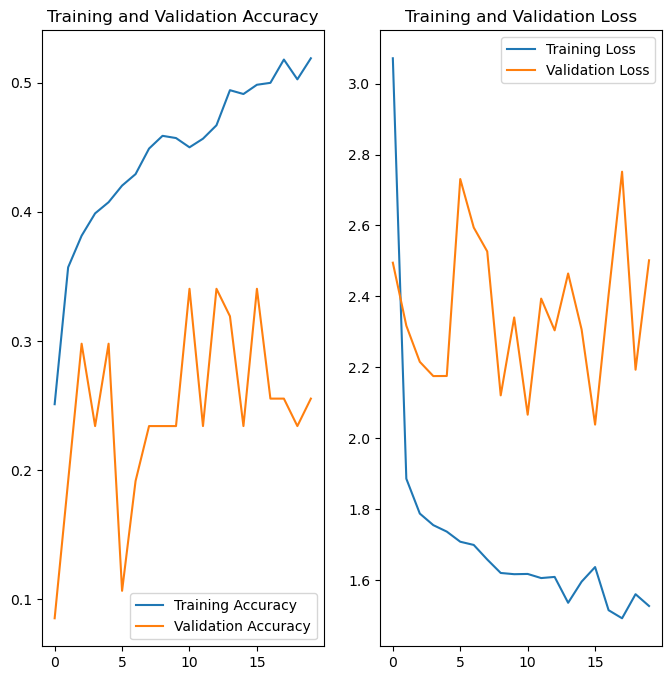

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()